In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from collections import Counter
import random
import colorsys

In [2]:
def rgb_to_xyz(sR, sG, sB):
    var_R = ( sR / 255 )
    var_G = ( sG / 255 )
    var_B = ( sB / 255 )

    if ( var_R > 0.04045 ):
        
        var_R = pow(( ( var_R + 0.055 ) / 1.055 ), 2.4)
    else:
        var_R = var_R / 12.92
    if ( var_G > 0.04045 ):
        
        var_G = pow(( ( var_G + 0.055 ) / 1.055 ), 2.4)
    else:
        var_G = var_G / 12.92
    if ( var_B > 0.04045 ):
        var_B = pow(( ( var_B + 0.055 ) / 1.055 ), 2.4)
    else:
        var_B = var_B / 12.92

    var_R = var_R * 100
    var_G = var_G * 100
    var_B = var_B * 100

    X = var_R * 0.4124 + var_G * 0.3576 + var_B * 0.1805
    Y = var_R * 0.2126 + var_G * 0.7152 + var_B * 0.0722
    Z = var_R * 0.0193 + var_G * 0.1192 + var_B * 0.9505
    return [X, Y, Z]

def xyz_to_rgb(X, Y, Z):
    var_X = X / 100
    var_Y = Y / 100
    var_Z = Z / 100

    var_R = var_X *  3.2406 + var_Y * -1.5372 + var_Z * -0.4986
    var_G = var_X * -0.9689 + var_Y *  1.8758 + var_Z *  0.0415
    var_B = var_X *  0.0557 + var_Y * -0.2040 + var_Z *  1.0570

    if ( var_R > 0.0031308 ):
        var_R = 1.055 * ( pow(var_R, ( 1 / 2.4 )) ) - 0.055
    else:
        var_R = 12.92 * var_R
    if ( var_G > 0.0031308 ):
        var_G = 1.055 * ( pow(var_G , ( 1 / 2.4 )) ) - 0.055
    else:
        var_G = 12.92 * var_G
    if ( var_B > 0.0031308 ):
        var_B = 1.055 * ( pow(var_B , ( 1 / 2.4 )) ) - 0.055
    else:
        var_B = 12.92 * var_B

    sR = var_R * 255
    sG = var_G * 255
    sB = var_B * 255
    return [sR, sG, sB]


In [3]:
# To get to XYZ-space and then, to go from XYZ to CIELUV:

# //Reference-X, Y and Z refer to specific illuminants and observers.
# //Common reference values are available below in this same page.




In [8]:
Reference_X = 100
Reference_Y = 100
Reference_Z = 100
def xyz_cieluv(X, Y, Z):    

    var_U = ( 4 * X ) / ( X + ( 15 * Y ) + ( 3 * Z ) )
    var_V = ( 9 * Y ) / ( X + ( 15 * Y ) + ( 3 * Z ) )

    var_Y = Y / 100
    if ( var_Y > 0.008856 ):
        var_Y = pow(var_Y, ( 1/3 ))
    else:
        var_Y = ( 7.787 * var_Y ) + ( 16 / 116 )

    ref_U = ( 4 * Reference_X ) / ( Reference_X + ( 15 * Reference_Y ) + ( 3 * Reference_Z ) )
    ref_V = ( 9 * Reference_Y ) / ( Reference_X + ( 15 * Reference_Y ) + ( 3 * Reference_Z ) )

    CIE_L = ( 116 * var_Y ) - 16
    CIE_u = 13 * CIE_L * ( var_U - ref_U )
    CIE_v = 13 * CIE_L * ( var_V - ref_V )
    return [CIE_L, CIE_u, CIE_v]

def cieluv_xyz(CIE_L, CIE_u, CIE_v):
    var_Y = ( CIE_L + 16 ) /116
    if (pow( var_Y, 3)  > 0.008856 ):
        var_Y = pow(var_Y, 3)
    else:
        var_Y = ( var_Y - 16 / 116 ) / 7.787

    ref_U = ( 4 * Reference_X ) / ( Reference_X + ( 15 * Reference_Y ) + ( 3 * Reference_Z ) )
    ref_V = ( 9 * Reference_Y ) / ( Reference_X + ( 15 * Reference_Y ) + ( 3 * Reference_Z ) )

    var_U = CIE_u / ( 13 * CIE_L ) + ref_U
    var_V = CIE_v / ( 13 * CIE_L ) + ref_V

    Y = var_Y * 100
    X =  - ( 9 * Y * var_U ) / ( ( var_U - 4 ) * var_V - var_U * var_V )
    Z = ( 9 * Y - ( 15 * var_V * Y ) - ( var_V * X ) ) / ( 3 * var_V )
    return [X, Y, Z]

[19.729714787956325, -4.8587283784679, -5.008926214881383]
[44.939474325928, 47.95466255425273, 52.84739341821022]
[9.617873195887242, -2.8578824158440503, -3.760971046331699]
[23.599044108159298, 26.932035853514382, 32.50957746857025]
[7.65345821778012, 1.1435917150719046, 2.5358014874720745]
[27.975262171152497, 21.79809783716218, 15.061726582018645]
[1.8847089608462966, -0.10265726305006417, -0.7216848142754433]
[7.898481383596918, 6.3346740659735845, 9.205864463357273]
[79.33794571977421, -29.997054871462986, -29.836047448538046]
[169.54072720838798, 200.49610975330816, 225.89499947913896]
[5.519055188058839, -1.6916862587242592, -2.688004064847891]
[15.459441523878915, 18.215817387577065, 23.99246364428433]
[5.519055188058839, -1.6916862587242592, -2.688004064847891]
[15.459441523878915, 18.215817387577065, 23.99246364428433]
[22.078801334048833, -9.612563824655261, -21.317203073182576]
[40.31825160116454, 52.81912972763352, 78.0095893420524]
[79.33794571977421, -29.99705487146298

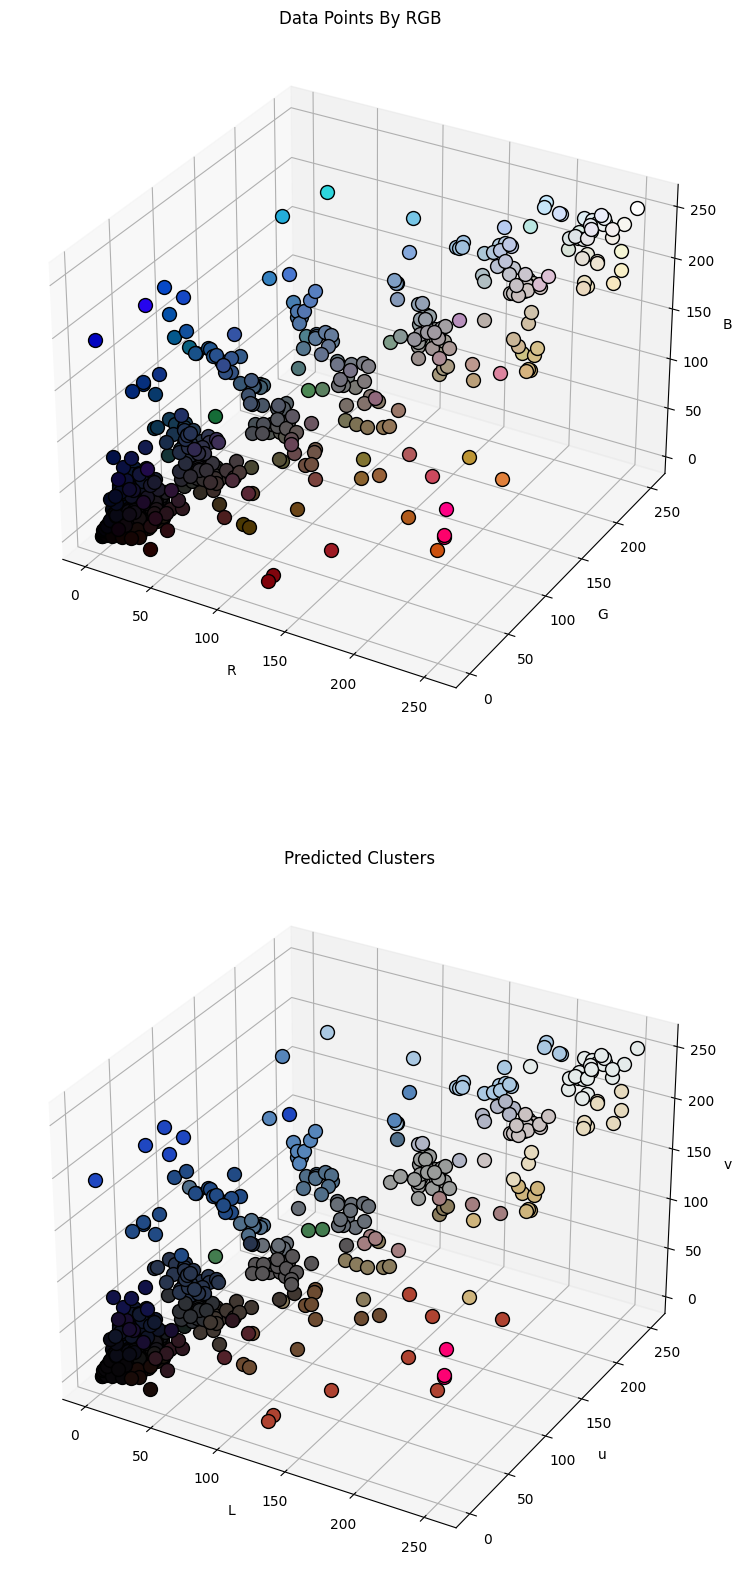

In [10]:
df = pd.read_csv("../data_sandstorm_new.csv")
bottom_df = df.loc[(df['name']=='Pants') | 
                   (df['name']=='Shorts') |
                   (df['name']=='Jeans')]
# bottom_df = df.loc[(df['name']=='Shirt')]

# save rgb values as hls values
X = []
for i, row in bottom_df.iterrows():
    rgb = [row['r'], row['g'], row['b']]
    X.append(rgb)

# # initialize kmeans class
# kmeans = KMeans(
#     init="random",
#     n_clusters=2,
#     n_init=10,
#     max_iter=300,
#     random_state=42)


cieluv_space = [] # hls

for color_point in X:
    pass

for i, row in bottom_df.iterrows():
    rgb = [row['r'], row['g'], row['b']]
    xyz = rgb_to_xyz(*rgb)
    cie = xyz_cieluv(*xyz)
    cieluv_space.append(cie)

# n = 5

# create dataset
# X, y = make_blobs(n_samples=200, centers=n, n_features=3,
#                   cluster_std=3.5, random_state=42)

def randColor():
    c = random.randint(0,255)/255
    return c

sil_score_max = -1 # this is the minimum possible score
best_n_clusters = 0
model = None



n_clusters = 38

model = KMeans(n_clusters=n_clusters, 
                        init='random', 
                        max_iter=300, 
                        n_init=10, 
                        random_state=42)


# fit data and generate predictions
model.fit(cieluv_space)
y_pred = model.labels_
centers = model.cluster_centers_


#plot
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(211, projection='3d')
ax.set_title("Data Points By RGB")
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')

ax1 = fig.add_subplot(212, projection='3d')
ax1.set_title("Predicted Clusters")
ax1.set_xlabel('L')
ax1.set_ylabel('u')
ax1.set_zlabel('v')

    
color_classes = {}

p_size = 100

for i, p in enumerate(X):
    px, py, pz = p
    c_train = np.array([x/255 for x in p]) # point color
    ciel = ([x for x in centers[y_pred[i]]]) # colors_pred[y_pred[i]]]
    print(ciel)
    # rgb = colorsys.hls_to_rgb(*hls)
    xyz = cieluv_xyz(*ciel)
    rgb = xyz_to_rgb(*xyz)
    # rgb = colorsys.hls_to_rgb(*hls)
    print(([x for x in rgb]))
    c_pred = np.array([x/255 for x in rgb])
    # print(c_pred)
    ax.scatter(px, py, pz, color=c_train, edgecolors='black', s=p_size)
    ax1.scatter(px, py, pz, color=c_pred, edgecolors='black', s=p_size)
    
plt.show()